# 聚类

## K-means聚类

### K-means聚类简述

**目标**：
K-means 聚类的主要目标是将一组数据点（一组样本）分成几个群组（或称“簇”），使得同一个簇内的数据点之间相似度高（即距离较近），而不同簇的数据点之间相似度低（即距离较远）。

**基本原理**：

1. **初始化**：首先随机选择 `k` 个数据点作为初始的簇中心。即需要预先给定分多少类。
2. **分配**：将每个数据点分配给最近的簇中心，形成 `k` 个簇。
3. **更新**：重新计算每个簇的中心点，通常取簇内所有点的均值作为新的簇中心。
4. **迭代**：重复分配和更新步骤，直到簇中心不再发生变化或达到预设的迭代次数。

**适用情况**：

- **数据特点**：适用于特征空间中的数据点分布较为均匀和规则的情况。
- **数据量**：适合处理大规模数据集，因为 K-means 的计算复杂度相对较低。
- **聚类形状**：最适合发现球形簇，对于非球形簇可能无法有效分组。
- **前提假设**：需要预先指定簇的数量 `k`，这通常需要依赖业务知识或额外的数据分析。

**应用举例**：

- 市场细分：通过客户购买行为数据进行聚类，识别不同的消费者群体。
- 文档分类：将文档集合根据文本内容聚类，用于信息组织和快速检索。
- 生物信息学：如基因表达数据的聚类，用于发现具有相似表达模式的基因。



### K-means聚类的迭代过程演示

这里演示了对一组样本（包含x和y两个属性）进行K-means聚类背后的过程。注意，这段代码只是用来生成演示，实际使用不会如此复杂。

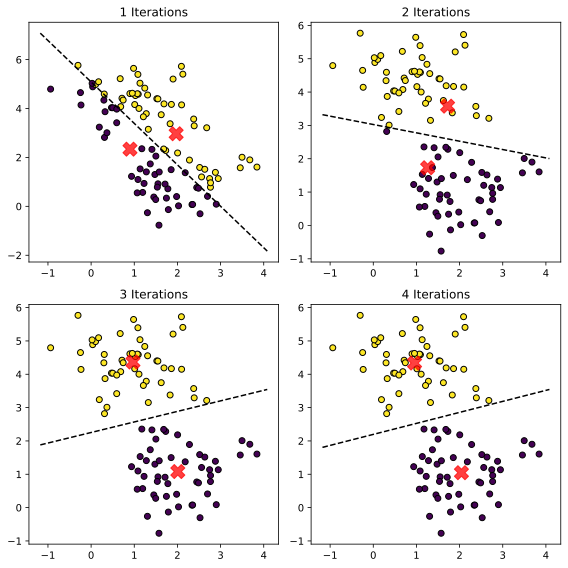

In [55]:
# | code-fold: true
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成数据
X, _ = make_blobs(n_samples=100, centers=2, cluster_std=0.75, random_state=0)


# 初始化图形
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.ravel()

# K-means 算法不同迭代次数的可视化
iterations = [1, 2, 3, 4]
for i, iter_num in enumerate(iterations):
    # 应用 K-means
    kmeans = KMeans(
        n_clusters=2, init="random", n_init=1, max_iter=iter_num, random_state=0
    )
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_

    # 绘制数据点
    axs[i].scatter(
        X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis", marker="o", edgecolor="k"
    )
    # 绘制聚类中心
    axs[i].scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.75, marker="X")
    axs[i].set_title(f"{iter_num} Iterations")
    # axs[i].grid(True)

    # 计算并绘制分类界限
    midpoint = np.average(centers, axis=0)
    slope = (centers[1, 1] - centers[0, 1]) / (centers[1, 0] - centers[0, 0])
    perpendicular_slope = -1 / slope
    intercept = midpoint[1] - perpendicular_slope * midpoint[0]
    x_vals = np.array(axs[i].get_xlim())
    y_vals = perpendicular_slope * x_vals + intercept
    axs[i].plot(x_vals, y_vals, "k--")  # 使用黑色虚线表示界限

# 显示图形
plt.tight_layout()
plt.show()